<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_03_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bonus Assignment 03 (Week 03)
Polynomial Regression and Regularization

Submit your completed .ipynb notebook file.
Fill in all code blocks where indicated.

Answer all questions clearly in markdown cells below each part.
Comment your code for clarity

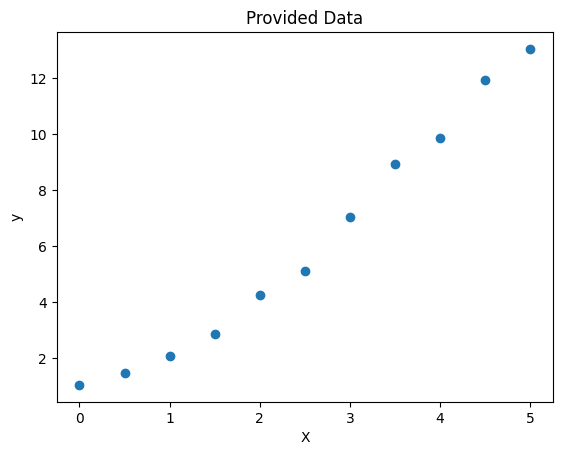

In [1]:
# Provided Raw Data
import numpy as np
import matplotlib.pyplot as plt
# Provided raw data arrays
X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
5.0]).reshape(-1, 1)
y = np.array([1.05, 1.47, 2.09, 2.87, 4.25, 5.12, 7.05, 8.91, 9.87,
11.92, 13.03])
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Provided Data')
plt.show()

Part 1: Polynomial Regression
Fit Polynomial Regression models for degrees 1, 2, and 4
1. Use PolynomialFeatures from scikit-learn to transform X for each degree.
2. Fit a LinearRegression model on the transformed features.
3. Predict on a smooth grid of X values to plot regression curves.
4. Plot original data and all fitted polynomial curves on the same graph.

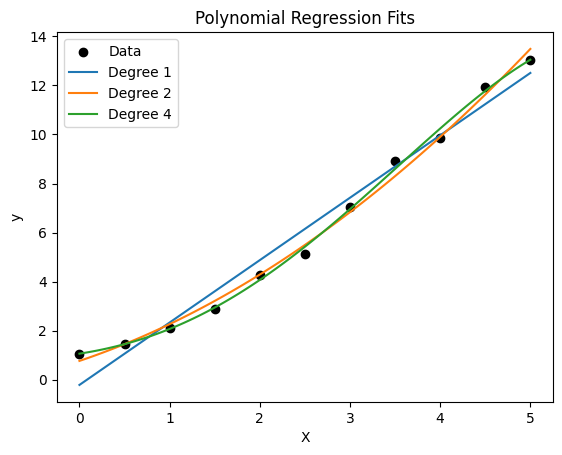

In [3]:
# @title Answer for Part 1 with comments inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# List of degrees to iterate through
degrees = [1, 2, 4]

# Create the initial scatter plot of the raw data
plt.scatter(X, y, color='black', label='Data')

# Dense grid for smooth curve
X_fit = np.linspace(0, 5, 100).reshape(-1,1)


# Loop through each degree to perform polynomial regression
for degree in degrees:
# Your code here:
# 1. Create polynomial features for 'degree'
# This transformer will create new features that are powers of the original features.
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

# 2. Fit LinearRegression model on transformed X
# This model will now be able to fit a polynomial curve.
    model = LinearRegression()
    model.fit(X_poly, y)

# Transform the dense grid for prediction
    X_fit_poly = polynomial_features.fit_transform(X_fit)

# 3. Predict y values for X_fit transformed features
    y_fit = model.predict(X_fit_poly)

# 4. Plot the predicted curve with a label showing degree
    plt.plot(X_fit, y_fit, label=f'Degree {degree}')


# Add plot labels and a legend for clarity
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fits')
plt.legend()
plt.show()

Answer the following
**Question Part1-1:** How does increasing the polynomial degree affect the model fit?

**Answer Part 1-1:**
Increasing the polynomial degree, gives the model more flexibility to fit the training data. A higher degree allows the curve to have more bends and turns, which can help it capture more complex relationships within the data.

Degree 1 (Linear): This model is a simple straight line. It's not flexible and can't capture the slight curve in the data.

Degree 2 (Quadratic): This model is a parabola, which is more flexible than a straight line. It seems to fit the general trend of the data points quite well.

Degree 4 (Quartic): This model is even more flexible. It wiggles and turns to pass very close to, or even directly through, all of your data points.

Thus **increasing the degree increases the model's complexity and its ability to fit the training data more closely**.

**Question Part1-2:**. Which degree seems to underfit or overfit? Why?

**Answer Part 1-2:**

Based on observations in this plot:

**Degree 1 model shows underfitting**. The straight line is too simple to capture the underlying pattern of the data. It has a high bias because it makes a strong assumption (that the relationship is linear) that is incorrect. It doesn't fit the training data well, and would perform poorly on new data.

**Degree 4 model shows overfitting**. The curve is so flexible that it perfectly captures every single data point, including any noise or small variations. It has high variance because it is extremely sensitive to the specific training data points. However it can perform very poorly on new, unseen data points that don't fall exactly on the curve.

**The Degree 2 model seems to strike a good balance.** It is flexible enough to capture the general trend of the data without being so complex that it starts to fit the noise. It represents a good tradeoff between bias and variance for this particular dataset.

Part 2: Ridge and Lasso Regression
Fit Ridge and Lasso models with polynomial degree 4
1. Generate degree 4 polynomial features for X.
2. For alpha values [0.01, 0.1, 1.0]:
Fit Ridge regression, predict on dense grid, and plot.
Fit Lasso regression, predict on dense grid, and plot.
3. Plot original data points and all curves separately for Ridge and Lasso

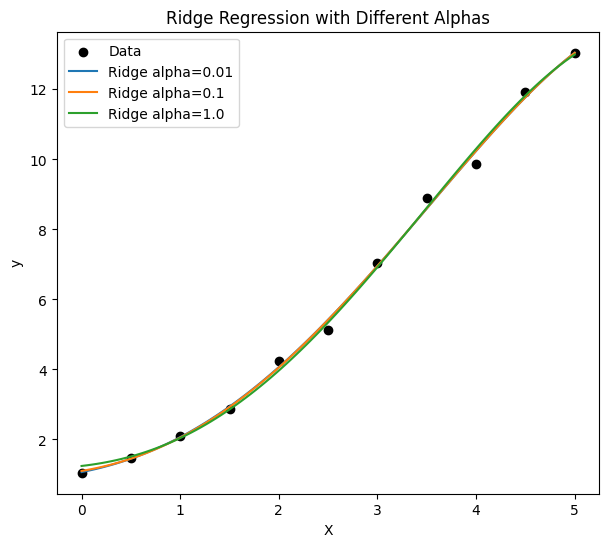

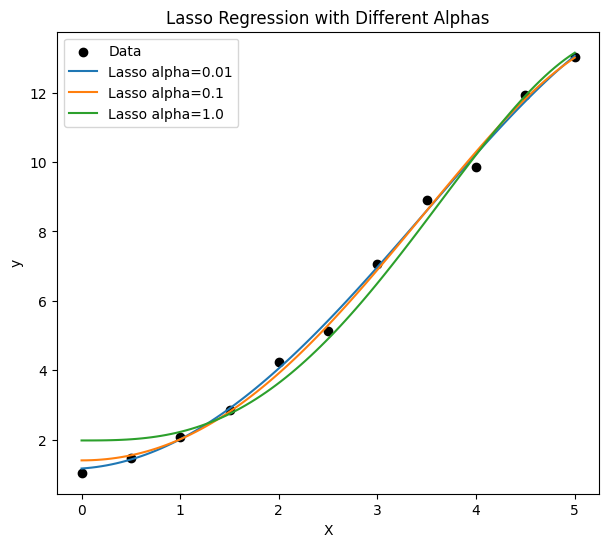

In [4]:
# @title Answer for Part 2 with comments inline
# using the raw data arrays provide in earlier cells


from sklearn.linear_model import Ridge, Lasso
alphas = [0.01, 0.1, 1.0]

# Generate degree 4 polynomial features once
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
X_fit_poly = poly.transform(np.linspace(0, 5, 100).reshape(-1,1))

# Ridge regression plots
# adding the necessary plt.figure() calls to ensure two separate plots are created, and
# providing the full implementation for fitting and
# plotting the Ridge and Lasso models inside their respective loops.
plt.figure(figsize=(7, 6))

plt.scatter(X, y, color='black', label='Data')
for alpha in alphas:
# Your code here:
# 1. Fit Ridge(alpha=alpha) on X_poly, y
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly, y)

# 2. Predict on X_fit_poly
    y_ridge_pred = ridge_model.predict(X_fit_poly)

# 3. Plot the prediction with label 'Ridge alpha=...'
    plt.plot(np.linspace(0, 5, 100), y_ridge_pred, label=f'Ridge alpha={alpha}')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Different Alphas')
plt.legend()
plt.show()


# Lasso regression plots
# adding the necessary plt.figure() calls to ensure two separate plots are created, and
plt.figure(figsize=(7, 6))

plt.scatter(X, y, color='black', label='Data')
for alpha in alphas:
# Your code here:
# 1. Fit Lasso(alpha=alpha, max_iter=10000) on X_poly, y
    # max_iter of 1000 ensures convergence for some alpha values.
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_poly, y)

# 2. Predict on X_fit_poly
    y_lasso_pred = lasso_model.predict(X_fit_poly)

# 3. Plot the prediction with label 'Lasso alpha=...'
    plt.plot(np.linspace(0, 5, 100), y_lasso_pred, label=f'Lasso alpha={alpha}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression with Different Alphas')
plt.legend()
plt.show()

Answer the following

**Question Part2-1:**
1. How does increasing alpha affect model complexity and fit in Ridge vs Lasso?

**Answer Part 2-1:**
Increasing the alpha value in both Ridge and Lasso regression increases the regularization strength. This penalizes larger coefficients, forcing them to shrink making it a simpler model with reduced complexity.

Ridge Regression: As alpha increases, the coefficients are shrunk toward zero. They get very close to zero but never become exactly zero. This means that even with a high alpha, all original features are still included in the model to some extent. The fit becomes **smoother and less prone to overfitting**, trading **some bias for a significant reduction in variance**.


Lasso Regression: Similar to Ridge, increasing alpha shrinks coefficients. However, a key difference is that Lasso can shrink some coefficients all the way to exactly zero. This **has the effect of performing feature selection**, as the features with zero coefficients are effectively removed from the model. This **leads to a sparser, simpler model**.


**Question Part2-2:**

2. Compare Ridge and Lasso fits to plain polynomial regression. What differences do you observe?
**Answer Part 2-2:**
The plain polynomial regression with degree 4 (from our earlier analysis) shows significant overfitting. The curve is complex and wiggles to pass through every data point, capturing noise in the training data rather than the true underlying trend. It has low bias but high variance.

In contrast, both Ridge and Lasso regression with a degree 4 polynomial produce much smoother, simpler fits.

For small alpha values (e.g., 0.01): The Ridge and Lasso fits are still quite flexible and similar to the plain polynomial regression, but they are slightly less "wiggly." They are less prone to overfitting than the unregularized model.

For larger alpha values (e.g., 1.0): The fits become significantly simpler. They look more like a degree 2 or 3 polynomial, rather than the degree 4 polynomial they were derived from. This is because the regularization penalty has effectively reduced the influence of the higher-degree features.

The key difference is that while plain polynomial regression focuses only on minimizing the error on the training data, **Ridge and Lasso balance this with a penalty on model complexity. This helps them to generalize better to new data by preventing overfitting.**


**Question Part2-3:**

3. When might you choose Lasso over Ridge?

**Answer Part 2-3:**
Lasso is choosen over Ridge primarily when many of your features are irrelevant or redundant.

**Preferred for Feature Selection:** Because Lasso can shrink coefficients to exactly zero, it automatically performs feature selection. This is a powerful property when you are working with a dataset that has a very large number of features, as it can simplify the model and make it more interpretable.

**Preferred for Sparser Models**: The resulting model from Lasso is sparse, meaning it uses only a subset of the available features. This is often beneficial for both interpretability and computational efficiency.

However in situations where all features are expected to be relevant and contribute to the model, **Ridge is often a better choice because it will keep all features in the model**, simply shrinking their coefficients.
